# Census Income Project

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore');

data = pd.read_csv('/content/sample_data/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.shape

(32560, 15)

We've 32560 rows and 15 columns

Converting target column into numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Income'] = le.fit_transform(data[['Income']])

In [ ]:
data['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

Columnn has been converted successfully

 - Let's understand the data



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


This shows there is no missing values

Let's treat the integer type column first

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93424ae5d0>,
      dtype=object)

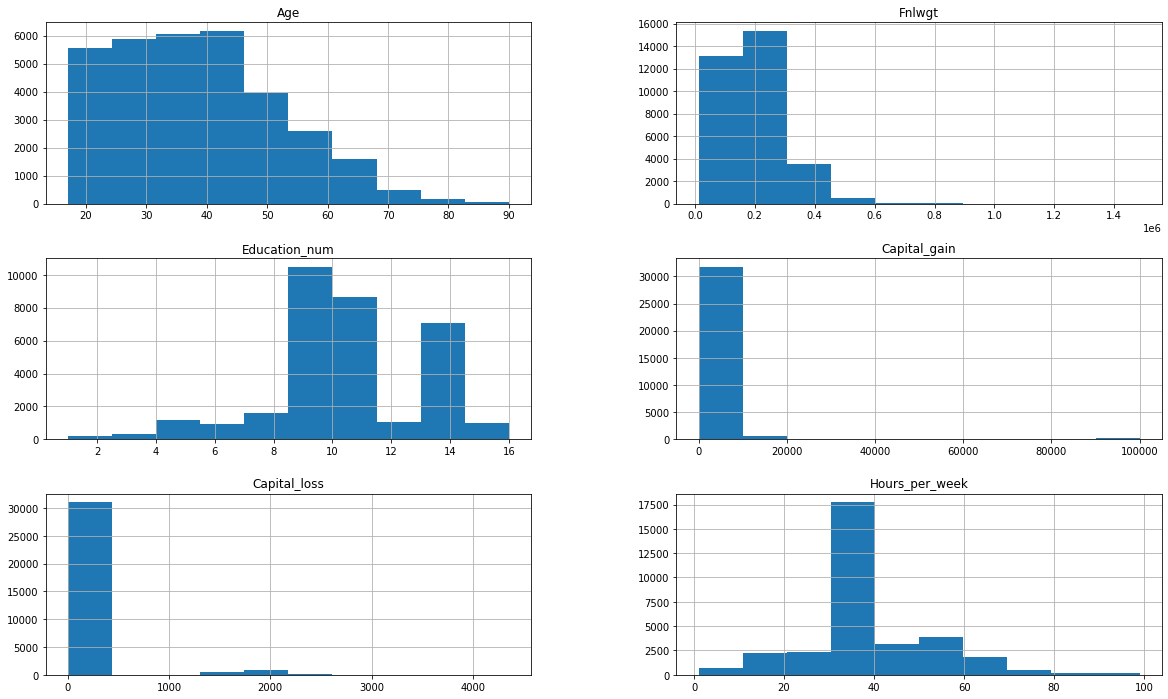

In [ ]:
rcParams['figure.figsize'] = 20,12
data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].hist()

From the above histogram : <br>
 1. Fnlwgt,Capital_gain,Capital_loss are left skewed.<br>
 2. We need to analyse Education_num further.<br>
 3. Age, Hours_per_week can be split up into bins.

Let's see the correlation between feature and variable

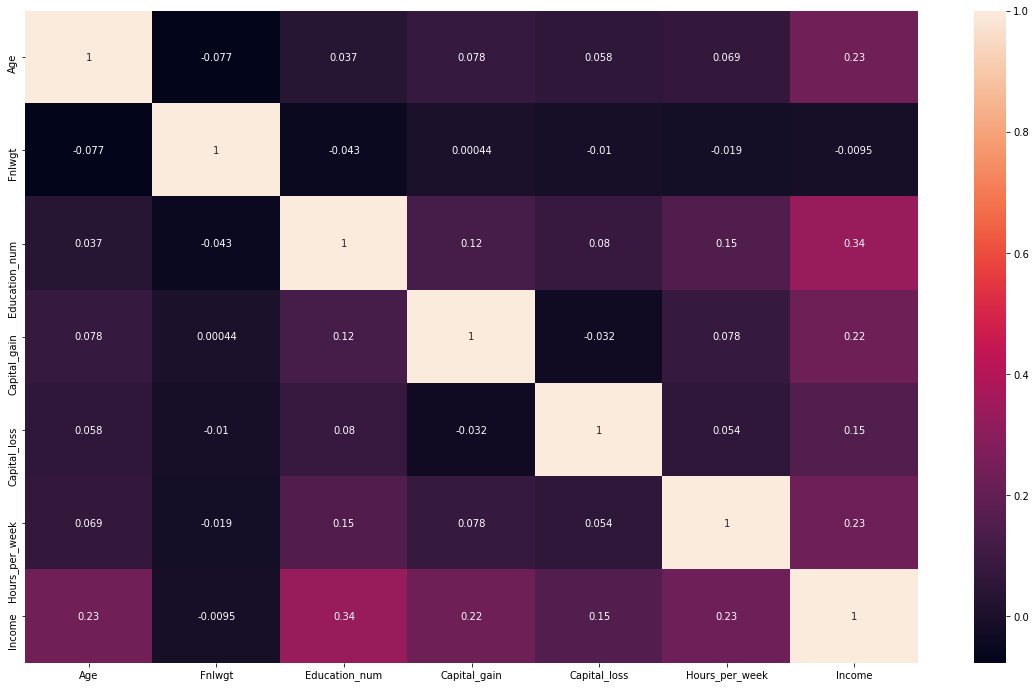

In [ ]:
corr_mat = data.corr()
#mat = np.array(corr_mat)
#mat[np.tril_indices_from(mat)] = False

sns.heatmap(data=corr_mat, annot=True)

The above plot shows that : 
1. There is no correlation of continuos variable with target variable.
2. Fnlwgt has zero correlation with label. I'll drop it later.

**Analyse the categorical features**

# **Age**

 - 0 - 25 = Young
 - 25 - 50 = Adult 
 - 50 - 100 = Old

In [ ]:
data['Age'] = pd.cut(data['Age'], bins=[0,25,50,100], labels=['Young','Adult','Old'])

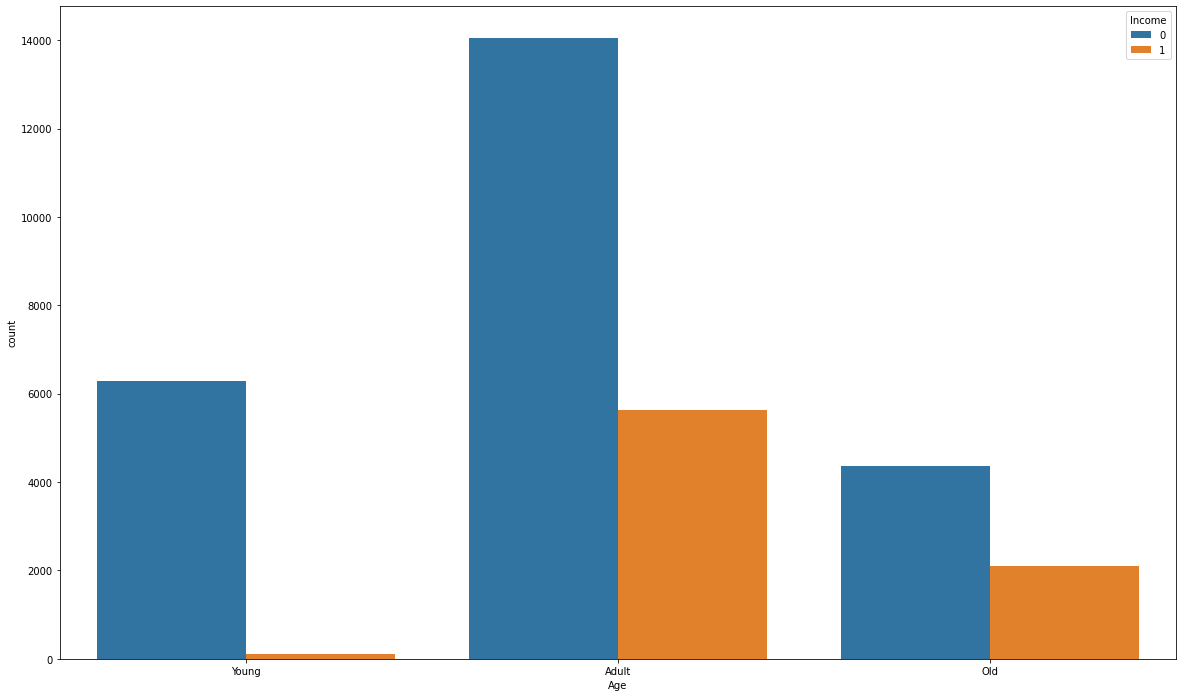

In [ ]:
sns.countplot(x = 'Age', hue = 'Income', data = data)

 - Above plot shows that there are less young are having more than $50K income.

## **Capital Gain and Capital Loss**

Let's take a difference betwen them

In [ ]:
data['Capital Difference'] = data['Capital_gain'] - data['Capital_loss']
data.drop(['Capital_gain'], axis=1 , inplace=True)
data.drop(['Capital_loss'], axis=1 , inplace=True)

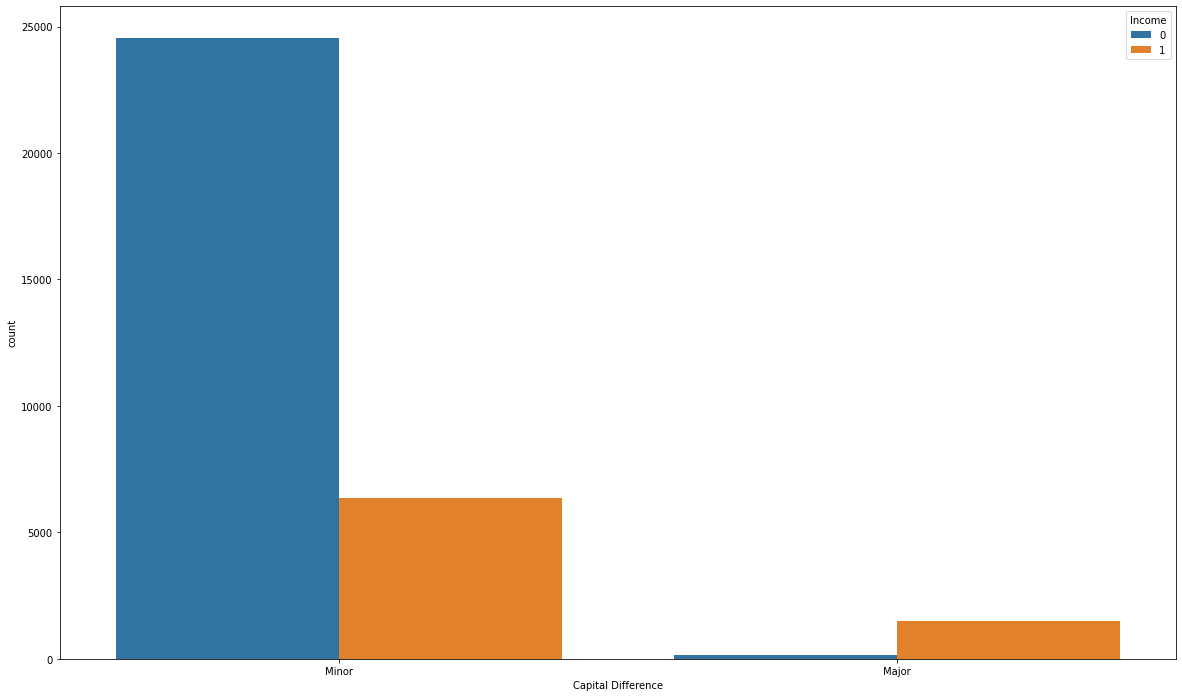

In [ ]:
data['Capital Difference'] = pd.cut(data['Capital Difference'], bins=[-5000,5000,100000], labels=['Minor','Major'])
sns.countplot(x='Capital Difference', hue='Income', data=data)

Above plot shows that : 
 - For Minor there are more people with less than 50K income.
 - For Major there are more people with income greater than 50K. 
 - So I can say that the more capital gain have more income.

## **Fnlwgt**

As we saw there were no relation of fnlwgt with label, so better to drop it.

In [ ]:
data.drop(['Fnlwgt'], axis=1, inplace=True)

## **Hours Per Week**

Generally the hours per week close to 30-40 hrs.let's split it.

In [ ]:
data['Hours_per_week'] = pd.cut(data['Hours_per_week'], bins=[0,30,40,100], labels=['Lesser Hours','Normal Hours','Extra Hours'])

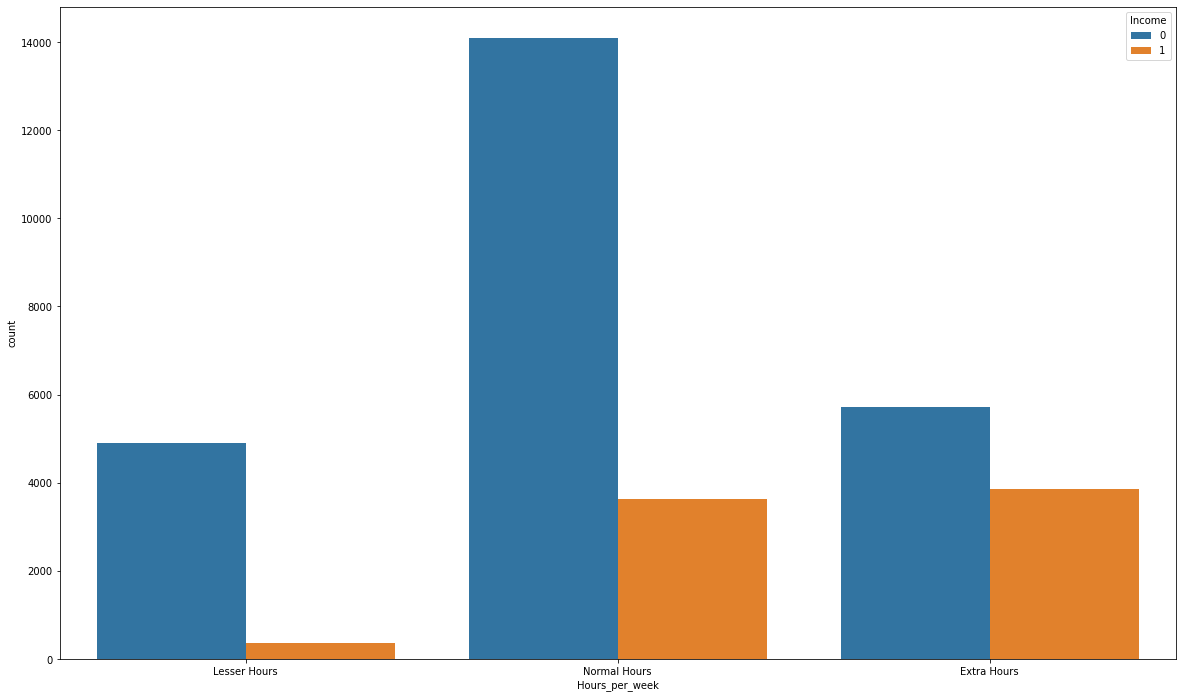

In [ ]:
sns.countplot(x='Hours_per_week', hue='Income', data=data)

As I can see that the no of hrs increases the no of people earning income more than $50K also increases.  

## **Work Class**

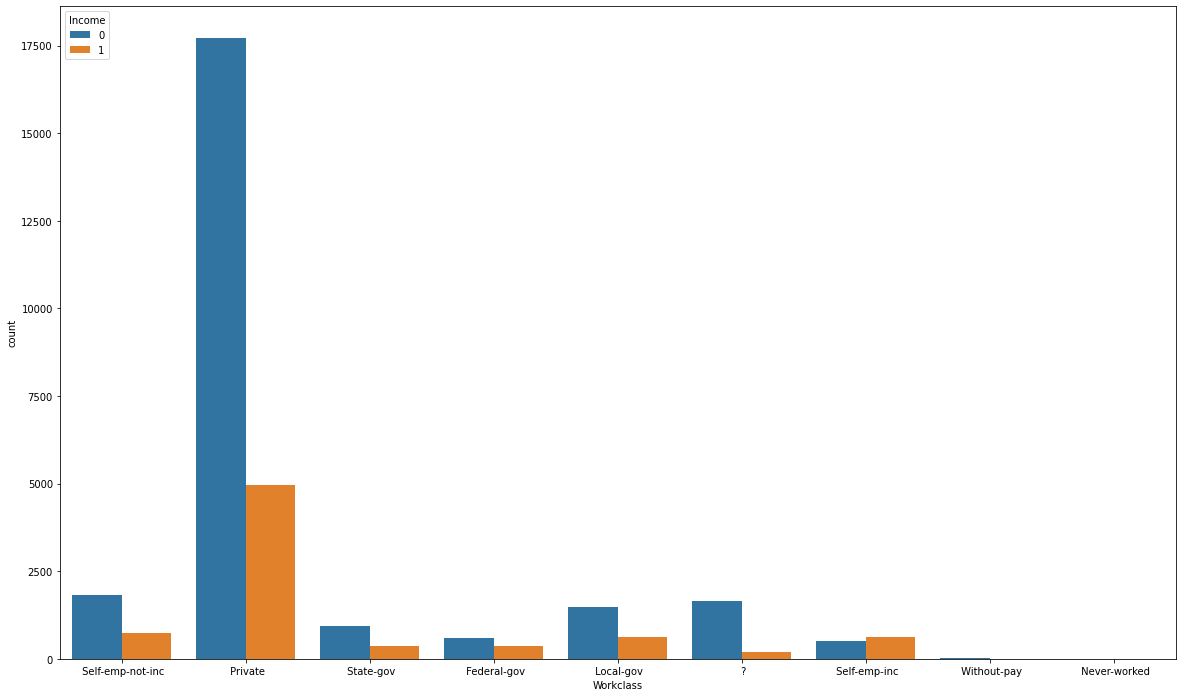

In [ ]:
sns.countplot(x='Workclass', hue='Income', data=data)

Now from the above plot, I see some error data denoted by "?" and Without-pay, Never-worked are negligible.So, better to drop it.

## **Eduaction and Education Number**

Let's check the relationship between Education and Education Number.

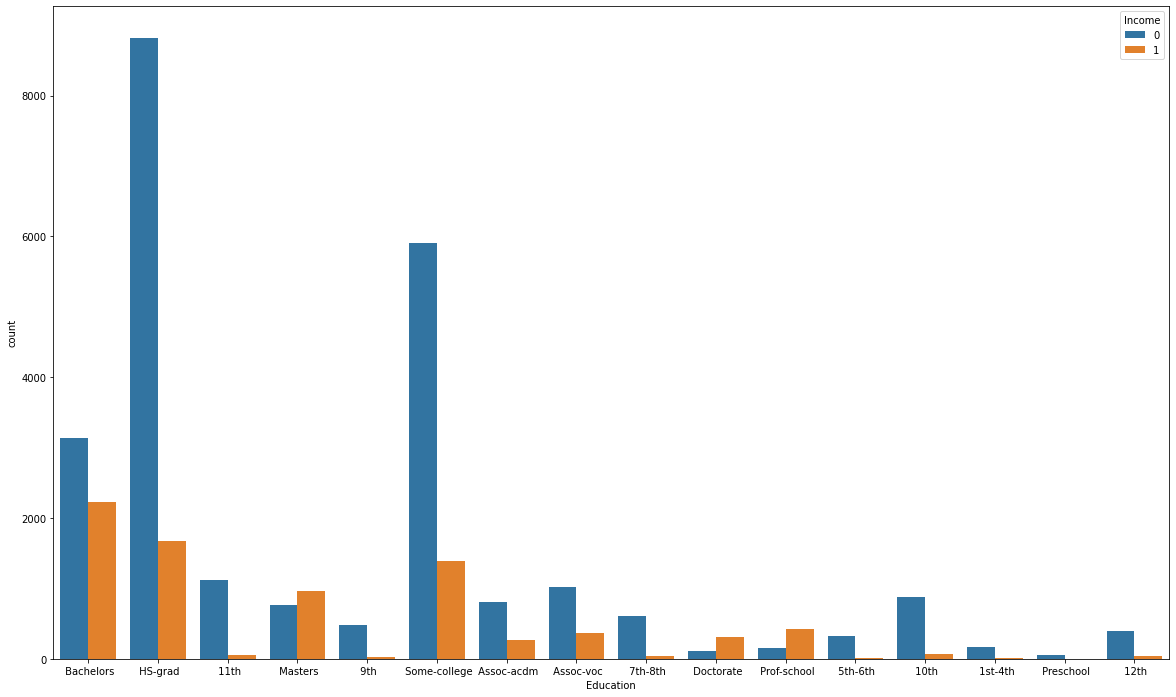

In [ ]:
sns.countplot(x='Education', hue='Income', data=data)

In [ ]:
eduaction_classes = data['Education'].unique()

for edu_class in eduaction_classes:
  print('For {}, The Education Number is {} '
        .format(edu_class, data[data['Education'] == edu_class]['Education_num'].unique()))

For  Bachelors, The Education Number is [13] 
For  HS-grad, The Education Number is [9] 
For  11th, The Education Number is [7] 
For  Masters, The Education Number is [14] 
For  9th, The Education Number is [5] 
For  Some-college, The Education Number is [10] 
For  Assoc-acdm, The Education Number is [12] 
For  Assoc-voc, The Education Number is [11] 
For  7th-8th, The Education Number is [4] 
For  Doctorate, The Education Number is [16] 
For  Prof-school, The Education Number is [15] 
For  5th-6th, The Education Number is [3] 
For  10th, The Education Number is [6] 
For  1st-4th, The Education Number is [2] 
For  Preschool, The Education Number is [1] 
For  12th, The Education Number is [8] 


From the above analysis, 
 - It seems like the Education and Education_num are same. So I can drop any of column amongs them.
 - I can clubbed preschool to 12th together in one class.

In [ ]:
data.drop(['Education_num'], axis=1, inplace=True)

In [60]:
data['Education'].replace(['11th','9th','7th-8th','5th-6th','10th','1st-4th','Preschool','12th'],
                          'School', inplace=True)

In [61]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

**Marital Status and Relationship**

In [63]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [64]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Both of them have no missing values.

## **Occupation**

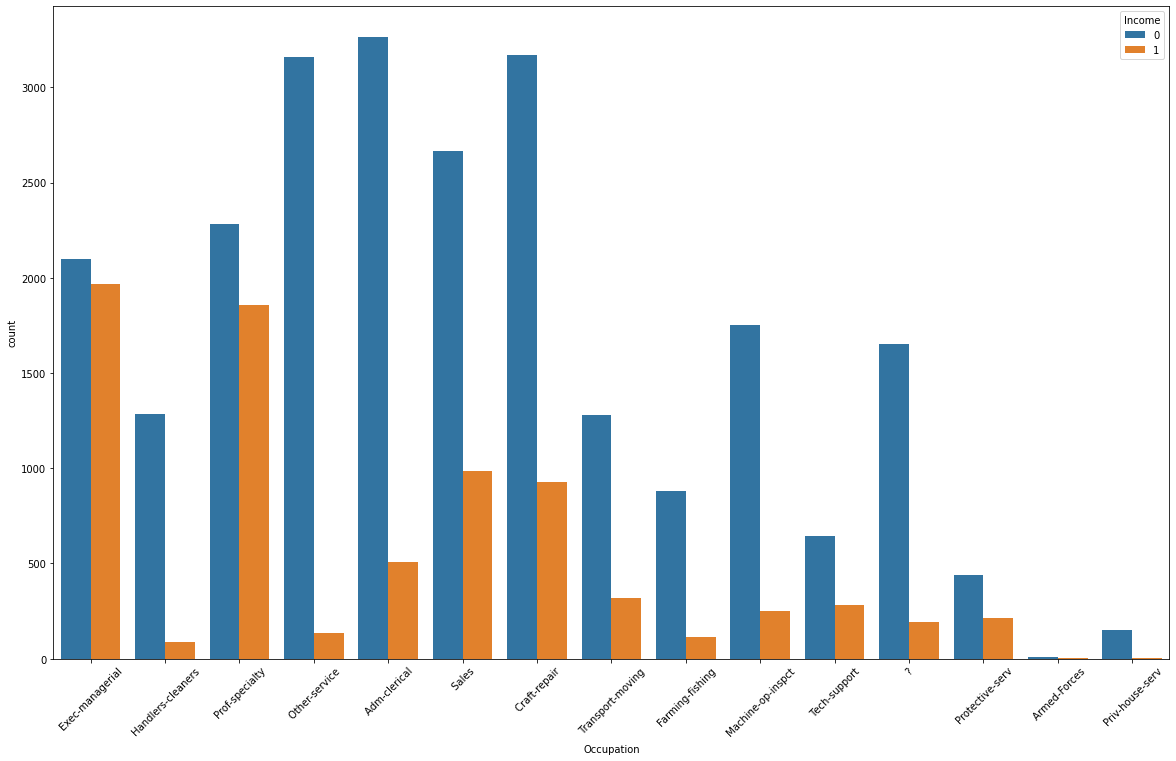

In [71]:
plt.xticks(rotation=45)
sns.countplot(x='Occupation', hue='Income', data=data)

As I can see there is no missing values.

## **Race**

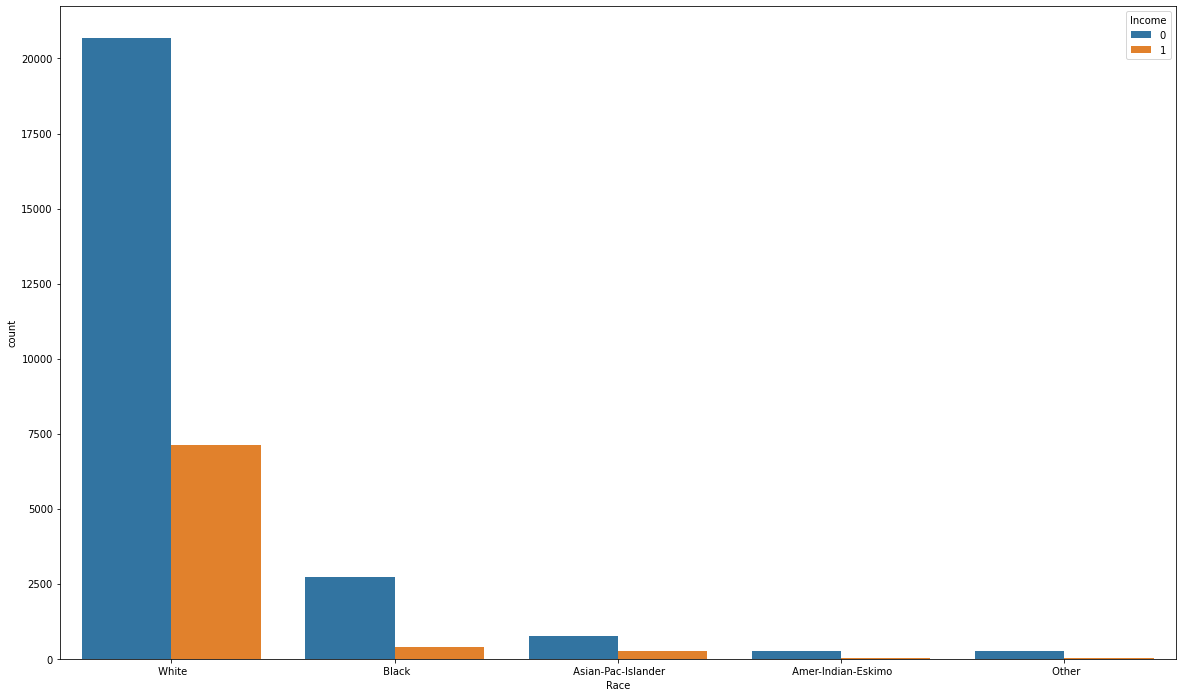

In [72]:
sns.countplot(x='Race', hue='Income', data=data)

## **Sex**

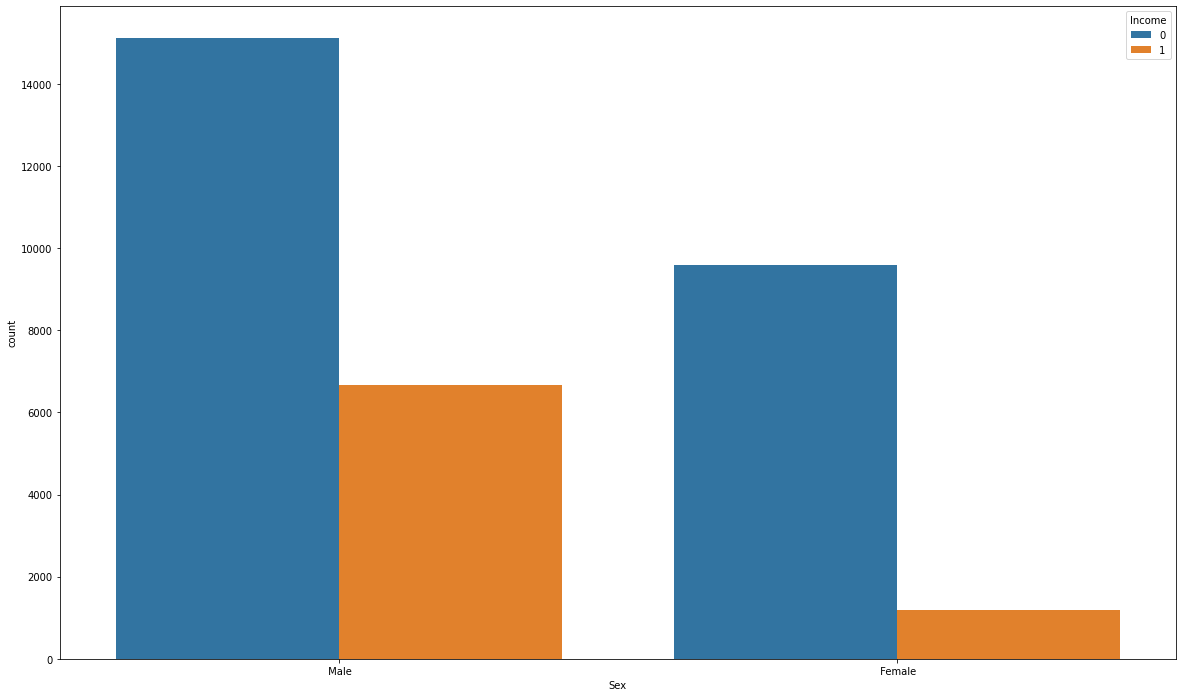

In [73]:
sns.countplot(x='Sex', hue='Income', data=data)

From the above plot,
 - As compared to female there are more % male are having income more than $50K.

## **Country**

In [79]:
country_count = data['Native_country'].value_counts() 
country_count

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Text(0.5, 1.0, 'Total adult from each country')

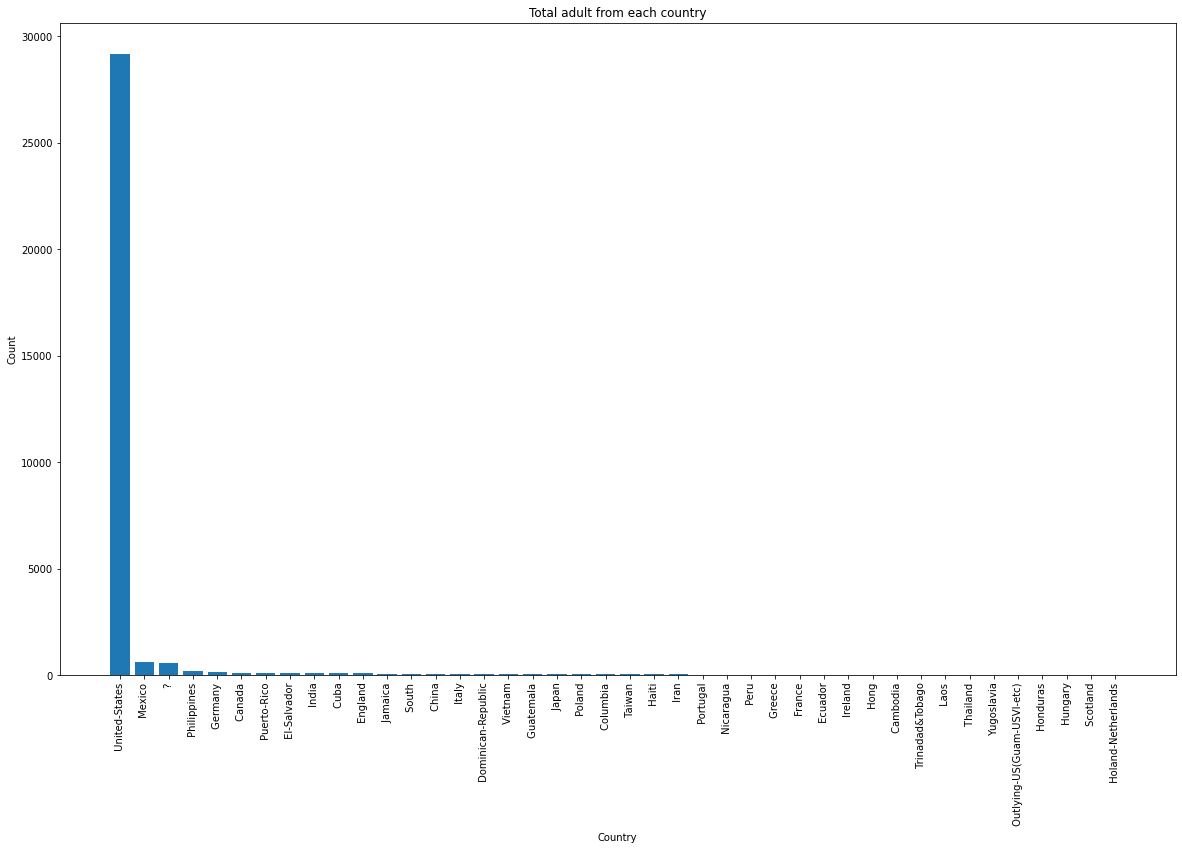

In [86]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Total adult from each country')

**From above plot,**
 - There is country column denoted by "?" shows error data, I'll drop it.
 - Majority of people from United States are earning more than $50k, I ll distribute them.

In [92]:
data = data.drop(data[data['Native_country']=='?'].index)

In [94]:
countries = np.array(data['Native_country'].unique())
countries = np.delete(countries, 0)

In [96]:
data['Native_country'].replace(countries, 'Other', inplace=True)

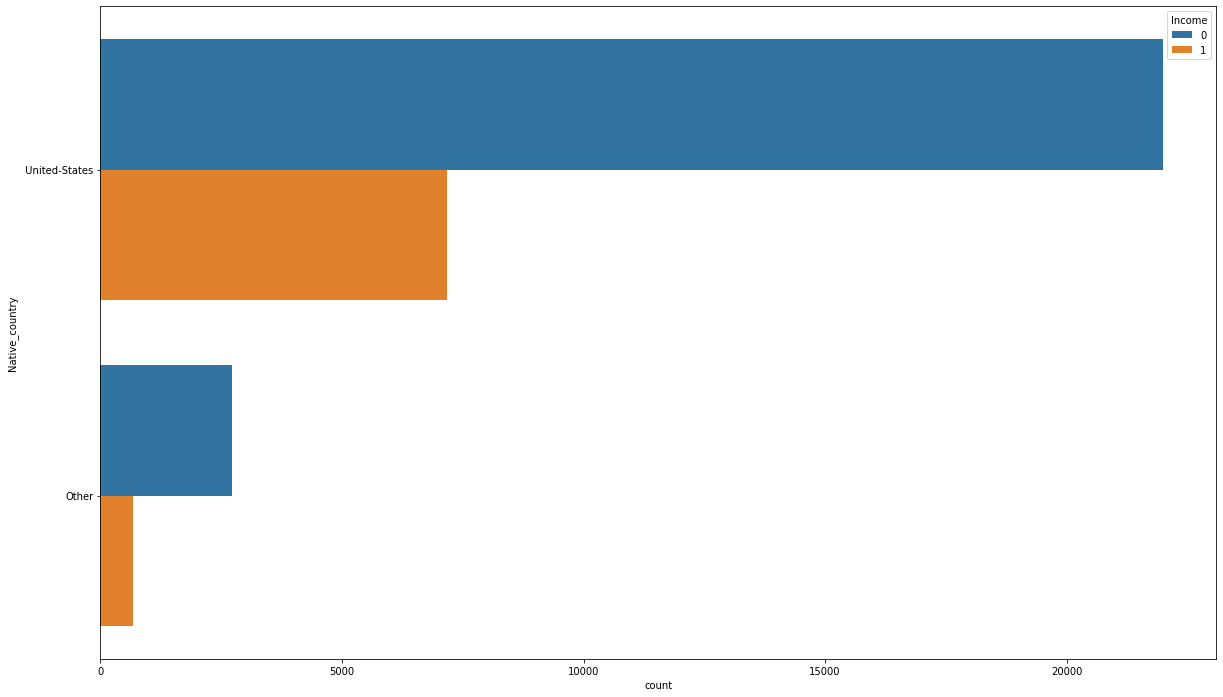

In [97]:
sns.countplot(y='Native_country', hue='Income', data=data)

Now, data looks much better.

## **Data Manipulation**

 - In this, I'll convert categorical data into numeric values.
 - I'll make use of remaining columns

In [99]:
y = data['Income']
X = data.drop(['Income'], axis=1)
X = pd.get_dummies(X)
print('Features shape : {}'.format(X.shape[1]))

Features shape : 70


## **Split the data into training and testing**

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=465412)

Now, we can feed data to model.

I'll apply 5 algorithms for classification as follows :
 - Neive Bayes Classifier
 - Support Vector Classifier
 - Random Forest Classifier
 - Gradient Boosting Classifier
 - Decision Tree Classifier

In [101]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [137]:
classifiers = (GaussianNB(),
               SVC(kernel='rbf', probability=True),
               DecisionTreeClassifier(random_state=0),
               RandomForestClassifier(n_estimators=100,random_state=0),
               GradientBoostingClassifier(random_state=0))

 classifiers_names = ['Neive Bayes Classifier',
                     'Support Vector Classifier',
                     'Random Forest Classifier',
                     'Gradient Boosting Classifier',
                     'Decision Tree Classifier']

accuracies = []

In [128]:
m1 = GaussianNB()

In [143]:
m1.fit(X_train, y_train)
y_pred1 = m1.predict(X_test)

print('Neive Bayes Classifier ')
print('F1_Score :', f1_score(y_test, y_pred1)*100)
print('Accuracy :', accuracy_score(y_test, y_pred1)*100)

Neive Bayes Classifier 
F1_Score : 56.12270555695248
Accuracy : 64.27108927108927


In [134]:
m2 = SVC(kernel='rbf', probability=True)
m2.fit(X_train, y_train)
y_pred2 = m2.predict(X_test)
print('Support Vector Classifier')
print('F1_Score :', f1_score(y_test, y_pred2)*100)
print('Accuracy :', accuracy_score(y_test, y_pred2)*100,'\n')

m3 = DecisionTreeClassifier(random_state=0)
m3.fit(X_train, y_train)
y_pred3 = m3.predict(X_test)
print('Decision Tree Classifier')
print('F1_Score :', f1_score(y_test, y_pred3)*100)
print('Accuracy :', accuracy_score(y_test, y_pred3)*100,'\n')


m4 = RandomForestClassifier(n_estimators=100,random_state=0)
m4.fit(X_train, y_train)
y_pred4 = m4.predict(X_test)
print('Random Forest Classifier')
print('F1_Score :', f1_score(y_test, y_pred4)*100)
print('Accuracy :', accuracy_score(y_test, y_pred4)*100,'\n')


m5 = GradientBoostingClassifier(random_state=0)
m5.fit(X_train, y_train)
y_pred5 = m5.predict(X_test)
print('Gradient Boosting Classifier')
print('F1_Score :', f1_score(y_test, y_pred5)*100)
print('Accuracy :', accuracy_score(y_test, y_pred5)*100)

Support Vector Classifier
F1_Score : 65.78637113888234
Accuracy : 85.14537264537265 

Decision Tree Classifier
F1_Score : 60.544677020031514
Accuracy : 82.05364455364456 

Random Forest Classifier
F1_Score : 63.955307262569825
Accuracy : 83.48689598689599 

Gradient Boosting Classifier
F1_Score : 65.01800720288115
Accuracy : 85.08394758394758


## **Analysing Result**

From the above accuracy score, I can say that "Gradient Boosting Classifier" & "Support Vector Classifier" have the best accuracy which is 85%. I can consider any one amongs them.